# Analisis exploratorio de los datos


## 1. Contexto del Proyecto
Este notebook es el primer paso en un proyecto de investigación enfocado en la detección objetiva de la fatiga muscular. La fatiga en trabajadores con alta exigencia física es una problemática crítica en el Perú, resultando en diagnósticos tardíos y un aumento de lesiones musculoesqueléticas (TME).

Estudios locales han reportado una alta incidencia de TME en sectores clave, como la industria alimentaria (79.89% de trabajadores afectados) y el personal de limpieza hospitalaria (93.02% con dolor musculoesquelético). Estos datos subrayan la ineficacia de los métodos de detección actuales, que son principalmente subjetivos (basados en autoinformes de dolor o cansancio) y no reflejan el estado fisiológico real del músculo.


### 1.1 La Solución Propuesta: EMG y Clasificación
El Objetivo General de nuestro proyecto es desarrollar un modelo de clasificación que identifique el estado de fatiga muscular usando señales electromiográficas (EMG). La EMG ofrece una solución objetiva y no invasiva , ya que la señal eléctrica del músculo presenta cambios distintivos a medida que la fatiga se desarrolla.

El plan es utilizar bases de datos públicas para entrenar un modelo que reconozca patrones de fatiga, sirviendo como una futura herramienta de prevención de lesiones laborales.


### 1.2 Objetivo de este Notebook (El Rol del EDA)
Este EDA es la fase previa al procesamiento de datos. La base de datos titulada "A Dataset of sEMG and Self-Perceived Fatigue Levels for Muscle Fatigue Analysis" fue obtenida del repositorio Zenodo en la cual analizan los movimientos del brazo de 13 participantes diferentes.

Dado que la base de datos contiene 12 ejercicios distintos (teniendo cada uno un musculo agonista fijo) y se realizan para cada uno de los 13 participantes, un análisis exhaustivo es impráctico ya que en total tendríamos 12*13 = 156 hojas Excel de datos. Por lo tanto, el alcance de este notebook es analizar estratégicamente un subconjunto de 4 ejercicios, cada uno enfocado en un músculo agonista diferente (Biceps, Deltoid Anterior, Deltoid Medius, Deltoid Posterior). Estos ejecicios fueron realizados por los musculos del brazo derecho de los participantes y se espera que para la realización del procesamiento de datos en avances posteriores, este analisis se pueda extrapolar para ambos brazos. De no poder darse esta situación abría que ampliar el EDA y contar tambien al brazo izquierdo.

Los propósitos de este análisis exploratorio son:

- Validar la estructura y calidad de los datos de los 13 pacientes.

- Cuantificar la activación muscular (vía Desviación Estándar) en cada ejercicio.

- Identificar visualmente los patrones de activación: qué ejercicios "aíslan" un músculo y cuáles son "compuestos" (alta co-activación).

- Analizar la variabilidad de la señal entre los diferentes pacientes.

- Identificar los ejercicios que producen la señal de activación más clara y de mayor amplitud. Estos serán los "candidatos ideales" para el análisis de fatiga posterior, ya que los biomarcadores de fatiga serán más fáciles de extraer de una señal robusta que de una señal débil o ruidosa.



## 2. Interpretación de Gráficos del EDA (4 Ejercicios)
El análisis se centra en 4 ejercicios distintos, cada uno diseñado para tener un músculo agonista (motor principal) diferente: (1) Bíceps Brachii, (2) Deltoid Anterior, (3) Deltoid Medius, y (4) Deltoid Posterior. Se generó sus valores de media, máximos, minimos, etc de cada prueba o "Trial".

Además, para cada ejercicio, se generaron dos tipos de gráficos que se complementan:

Gráficos de Cajas y Bigotes (GCB1-GCB4): Muestran la distribución completa de la amplitud de la señal EMG cruda (en Voltios). Son útiles para ver la mediana, el rango intercuartílico (la "caja") y el rango total. Una caja más grande y bigotes más largos implican una mayor variabilidad y rango de amplitud.

Gráficos de Barras (H1-H4): Estos gráficos comparan la Desviación Estándar (Std Dev) de la amplitud. Esta medida es el mejor proxy para la activación muscular total o "energía" de la señal durante el ejercicio. Una barra más alta significa que el músculo estuvo, en promedio, más activo.

### Análisis Ejercicio por Ejercicio

### 2.1 Ejercicio Agonista: DELTOIDES ANTERIOR (Imágenes GCB 1 y H1)
Observación (Gráfico H1): Este es el resultado más claro. La barra naranja (Deltoides Anterior) es masivamente dominante, superando por 3 o 4 veces a cualquier otro músculo. Las otras tres barras (bíceps, d. medio, d. posterior) son mínimas.

Confirmación (Gráfico GCB 1): El gráfico de cajas es un reflejo perfecto de esto. La caja correspondiente al Deltoid_Anterior (la segunda) es enorme, mostrando un rango de amplitud y variabilidad inmenso, mientras que las otras tres cajas están comprimidas cerca de cero.

Interpretación: Este ejercicio aísla de forma extremadamente efectiva el Deltoides Anterior. Es un movimiento de alta intensidad y "limpio", ideal para tu análisis de fatiga, ya que la señal del músculo objetivo es clara e inequívoca.

### 2.2 Ejercicio Agonista: DELTOIDES POSTERIOR (Imágenes GCB 2 y H2)
Observación (Gráfico H2): La barra roja (Deltoides Posterior) es la más alta, lo que confirma que el ejercicio activa al músculo objetivo.

Confirmación (Gráfico GCB 2): El gráfico de cajas cuenta la historia completa. Si bien la caja del Deltoid_Posterior (la cuarta) es la más grande, todas las cajas son extremadamente pequeñas y están comprimidas cerca de cero.

Interpretación: Aunque el ejercicio activa el músculo correcto, la intensidad general del ejercicio es muy baja. La amplitud de la señal es débil en todos los músculos. Esto lo convierte en un candidato menos ideal para el análisis de fatiga, ya que será difícil distinguir los cambios por fatiga del ruido de fondo de la señal.

### 2.3 Ejercicio Agonista: BICEPS BRACHIAL (Imágenes GCB 3 y H3)
Observación (Gráfico H3): La barra azul (Biceps) es la más alta, lo cual es correcto. Sin embargo, la barra naranja (Deltoides Anterior) es la segunda más alta y muestra una activación muy significativa.

Confirmación (Gráfico GCB 3): El gráfico de cajas lo corrobora. La caja Biceps (la primera) es la que tiene el rango más amplio, pero la caja Deltoid_Anterior (la segunda) también es muy grande, indicando una fuerte participación.

Interpretación: Este no es un ejercicio de aislamiento. Es un movimiento compuesto que, aunque se enfoca en el Biceps, depende fuertemente del Deltoides Anterior como músculo sinergista (ayudante), probablemente para estabilizar o asistir en la flexión del hombro.

### 2.4 Ejercicio Agonista: DELTOIDES MEDIO (Imágenes GCB 4 y H4)
Observación (Gráfico H4): La barra verde (Deltoides Medio) es la más alta, como era de esperar. Sin embargo, la barra naranja (Deltoides Anterior) está casi a la misma altura, mostrando una activación casi idéntica.

Confirmación (Gráfico GCB 4): El gráfico de cajas lo refleja perfectamente. Las cajas Deltoid_Medius (tercera) y Deltoid_Anterior (segunda) son las dos más grandes y de tamaños muy similares.

Interpretación: Este es un claro ejemplo de activación compartida. Es biomecánicamente muy difícil aislar la porción media del hombro. Este ejercicio activa tanto la porción media como la anterior del deltoides con una intensidad casi igual.

## 3. Conclusiones

Mejor Candidato para Fatiga: El Ejercicio 1 (Agonista: Deltoides Anterior) es el candidato ideal indiscutible para el análisis de fatiga. Muestra un aislamiento muscular casi perfecto y la activación más alta y clara (la mayor Desviación Estándar). La fatiga será mucho más fácil de detectar en esta señal fuerte y "limpia".

Candidatos a Descartar o Tratar con Cuidado: El Ejercicio 2 (Agonista: Deltoides Posterior) es el candidato menos viable. La señal de activación es muy baja, y será extremadamente difícil distinguir la fatiga del ruido de fondo. Los Ejercicios 3 (Biceps) y 4 (Deltoides Medio) también son complicados, ya que la activación está muy repartida y compartida con el Deltoides Anterior, lo que podría introducir ambigüedad al analizar la fatiga de un solo músculo.

Sinergia del Deltoides Anterior: El hallazgo principal de este EDA es que el Deltoid_Anterior es un sinergista dominante en casi todos los movimientos del hombro y brazo, participando fuertemente incluso cuando no es el objetivo (como se vio claramente en el Ejercicio 3 (Biceps) y el Ejercicio 4 (D. Medio)).

Impacto en el Proyecto: Este análisis exploratorio ha sido fundamental para validar la viabilidad de la base de datos y definir una estrategia de análisis enfocada. Los resultados demuestran que no todos los ejercicios son igualmente útiles para el estudio de la fatiga. Ejercicios con baja activación (como el del Deltoides Posterior [Ej. 2]) o con una alta co-activación (como el del Biceps [Ej. 3] y D. Medio [Ej. 4]) probablemente introducirían ruido y ambigüedad en el modelo de clasificación. Por el contrario, este EDA confirma que los ejercicios que aíslan dominantemente un músculo (específicamente el Ejercicio 1, enfocado en el Deltoides Anterior) son el candidato ideal. Este proporcionará la señal robusta y clara, esencial para extraer con fiabilidad los patrones de fatiga.
Con esta validación, el proyecto puede avanzar con confianza. Los próximos pasos se centrarán exclusivamente en los "ensayos ideales" identificados, comenzando con el pre-procesamiento de la señal (filtrado). El EDA también reveló una alta variabilidad de amplitud entre pacientes (como se vio en los gráficos de barras de variabilidad), lo que subraya la necesidad de una normalización robusta (ej. por Contracción Voluntaria Máxima) como un paso crítico. Al enfocar el esfuerzo en datos de alta calidad, se maximiza la probabilidad de éxito en la extracción de características relevantes y, en última instancia, en el entrenamiento de un modelo de clasificación preciso capaz de predecir la fatiga muscular



## 4. Códigos utilizados

### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Para expresiones regulares (extraer el número de paciente)

### Código para evaluacion de Trial 1

--- Iniciando Carga y Consolidación ---
Cargado exitosamente: trial_1_pac1.csv (como pac1)
Cargado exitosamente: trial_1_pac2.csv (como pac2)
Cargado exitosamente: trial_1_pac3.csv (como pac3)
Cargado exitosamente: trial_1_pac4.csv (como pac4)
Cargado exitosamente: trial_1_pac5.csv (como pac5)
Cargado exitosamente: trial_1_pac6.csv (como pac6)
Cargado exitosamente: trial_1_pac7.csv (como pac7)
Cargado exitosamente: trial_1_pac8.csv (como pac8)
Cargado exitosamente: trial_1_pac9.csv (como pac9)
Cargado exitosamente: trial_1_pac10.csv (como pac10)
Cargado exitosamente: trial_1_pac11.csv (como pac11)
Cargado exitosamente: trial_1_pac12.csv (como pac12)
Cargado exitosamente: trial_1_pac13.csv (como pac13)

--- Consolidación Completa ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006021 entries, 0 to 3006020
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Time_s             float64
 1   Biceps             float64
 2   Deltoid_Ante

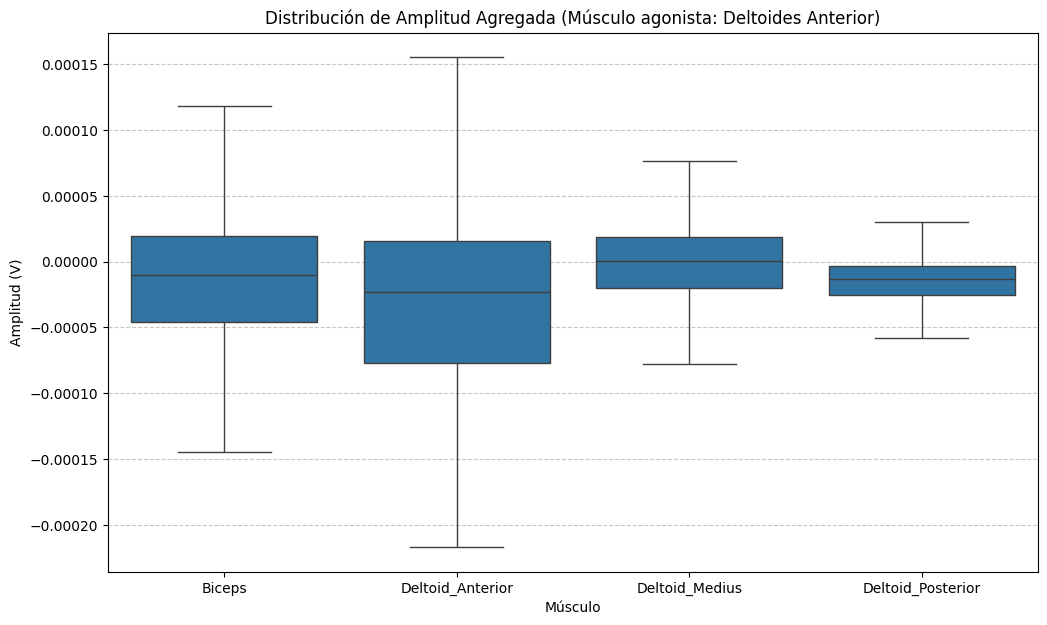

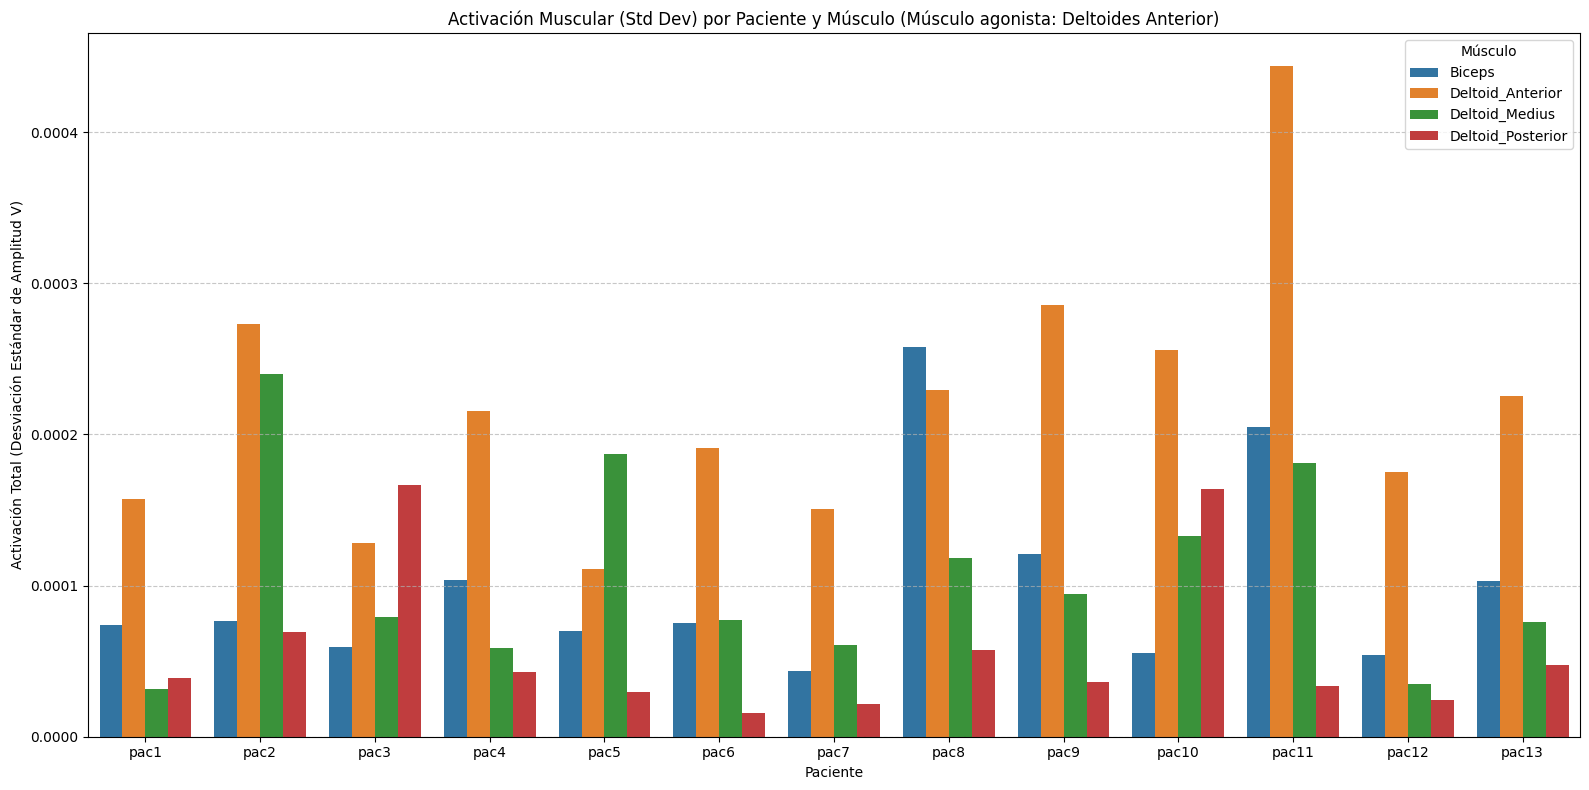

In [2]:
# --- CONFIGURACIÓN ---

file_list = [
    'trial_1_pac1.csv', 'trial_1_pac2.csv', 'trial_1_pac3.csv', 'trial_1_pac4.csv',
    'trial_1_pac5.csv', 'trial_1_pac6.csv', 'trial_1_pac7.csv', 'trial_1_pac8.csv',
    'trial_1_pac9.csv', 'trial_1_pac10.csv', 'trial_1_pac11.csv', 'trial_1_pac12.csv',
    'trial_1_pac13.csv'
]

# Columnas que queremos conservar y sus nuevos nombres más simples
columns_to_use = {
    'X [s]': 'Time_s',
    'R BICEPS BRACHII: EMG 1 [V]': 'Biceps',
    'R DELTOID ANTERIOR: EMG 2 [V]': 'Deltoid_Anterior',
    'R DELTOID MEDIUS: EMG 6 [V]': 'Deltoid_Medius',
    'R DELTOID POSTERIOR: EMG 7 [V]': 'Deltoid_Posterior'
}

# --- PASO 1: Carga y Consolidación ---

all_dfs_list = []
# Expresión regular para encontrar 'pac' seguido de uno o más números
patient_pattern = re.compile(r'pac(\d+)') 

print("--- Iniciando Carga y Consolidación ---")
for file_path in file_list:
    try:
        # Extraer el número de paciente del nombre del archivo
        match = patient_pattern.search(file_path)
        if match:
            # ej: "pac1", "pac10"
            patient_id = f"pac{match.group(1)}" 
        else:
            patient_id = "unknown"

        # Cargar el CSV
        df = pd.read_csv(file_path)
        
        # Seleccionar y renombrar las columnas que definimos arriba
        clean_df = df[list(columns_to_use.keys())].rename(columns=columns_to_use)
        
        # Añadir la nueva columna 'Patient' para saber de quién son los datos
        clean_df['Patient'] = patient_id
        
        # Añadir este DataFrame limpio a nuestra lista
        all_dfs_list.append(clean_df)
        print(f"Cargado exitosamente: {file_path} (como {patient_id})")

    except Exception as e:
        print(f"Error cargando {file_path}: {e}")

# Concatenar (unir) todos los DataFrames de la lista en uno solo
try:
    all_data_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n--- Consolidación Completa ---")
    # .info() nos da un resumen de la tabla final (cuántas filas, columnas, etc.)
    all_data_df.info()

    # --- PASO 2: Análisis de Duración ---
    print("\n--- Duración de la Prueba por Paciente (en segundos) ---")
    # Agrupamos por paciente y encontramos el valor máximo de tiempo
    durations = all_data_df.groupby('Patient')['Time_s'].max()
    print(durations)

    # --- PASO 3: Análisis Agregado (Todos los pacientes juntos) ---
    
    # Convertir la tabla de formato "ancho" a "largo".
    # Esto es necesario para que Seaborn pueda graficar por 'Muscle'
    long_df = all_data_df.melt(id_vars=['Patient', 'Time_s'],
                               var_name='Muscle',
                               value_name='Amplitude_V')

    print("\n--- Estadísticas Descriptivas Agregadas (Todos los Pacientes) ---")
    # Agrupar por músculo y calcular estadísticas (media, std, min, max)
    aggregated_stats = long_df.groupby('Muscle')['Amplitude_V'].describe()
    print(aggregated_stats)

    # Graficar el Box Plot Agregado
    plt.figure(figsize=(12, 7))
    # showfliers=False oculta los valores atípicos para ver mejor las "cajas"
    sns.boxplot(x='Muscle', y='Amplitude_V', data=long_df, showfliers=False) 
    plt.title('Distribución de Amplitud Agregada (Músculo agonista: Deltoides Anterior)')
    plt.ylabel('Amplitud (V)')
    plt.xlabel('Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('group_muscle_boxplot.png')
    print("\nGráfico de Box Plot Agregado guardado como 'group_muscle_boxplot.png'")

    # --- PASO 4: Análisis de Variabilidad (Inter-Paciente) ---
    
    # Calculamos la Desviación Estándar (std) como un indicador de "activación total"
    # para cada músculo y cada paciente.
    std_df = long_df.groupby(['Patient', 'Muscle'])['Amplitude_V'].std().reset_index()

    # Obtener una lista ordenada de pacientes (pac1, pac2, ... pac10)
    # para que el gráfico se muestre en orden.
    patient_order = sorted(std_df['Patient'].unique(), key=lambda x: int(re.search(r'(\d+)', x).group(1)))

    # Gráfico de Barras Agrupado
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Patient', y='Amplitude_V', hue='Muscle', data=std_df, order=patient_order)
    plt.title('Activación Muscular (Std Dev) por Paciente y Músculo (Músculo agonista: Deltoides Anterior)')
    plt.ylabel('Activación Total (Desviación Estándar de Amplitud V)')
    plt.xlabel('Paciente')
    plt.legend(title='Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta el gráfico para que todo quepa
    plt.savefig('patient_variability_barchart.png')
    print("Gráfico de Variabilidad por Paciente guardado como 'patient_variability_barchart.png'")

except Exception as e:
    print(f"Error durante el análisis o graficación: {e}")

### Código para evaluacion de Trial 3

--- Iniciando Carga y Consolidación ---
Cargado exitosamente: trial_3_pac1.csv (como pac1)
Cargado exitosamente: trial_3_pac2.csv (como pac2)
Cargado exitosamente: trial_3_pac3.csv (como pac3)
Cargado exitosamente: trial_3_pac4.csv (como pac4)
Cargado exitosamente: trial_3_pac5.csv (como pac5)
Cargado exitosamente: trial_3_pac6.csv (como pac6)
Cargado exitosamente: trial_3_pac7.csv (como pac7)
Cargado exitosamente: trial_3_pac8.csv (como pac8)
Cargado exitosamente: trial_3_pac9.csv (como pac9)
Cargado exitosamente: trial_3_pac10.csv (como pac10)
Cargado exitosamente: trial_3_pac11.csv (como pac11)
Cargado exitosamente: trial_3_pac12.csv (como pac12)
Cargado exitosamente: trial_3_pac13.csv (como pac13)

--- Consolidación Completa ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811697 entries, 0 to 4811696
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Time_s             float64
 1   Biceps             float64
 2   Deltoid_Ante

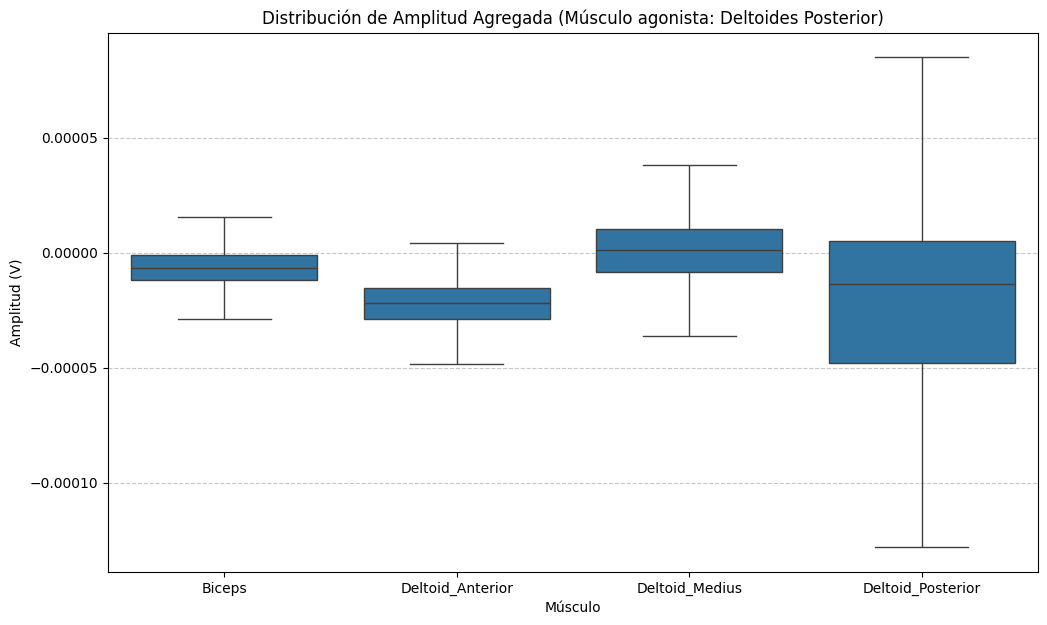

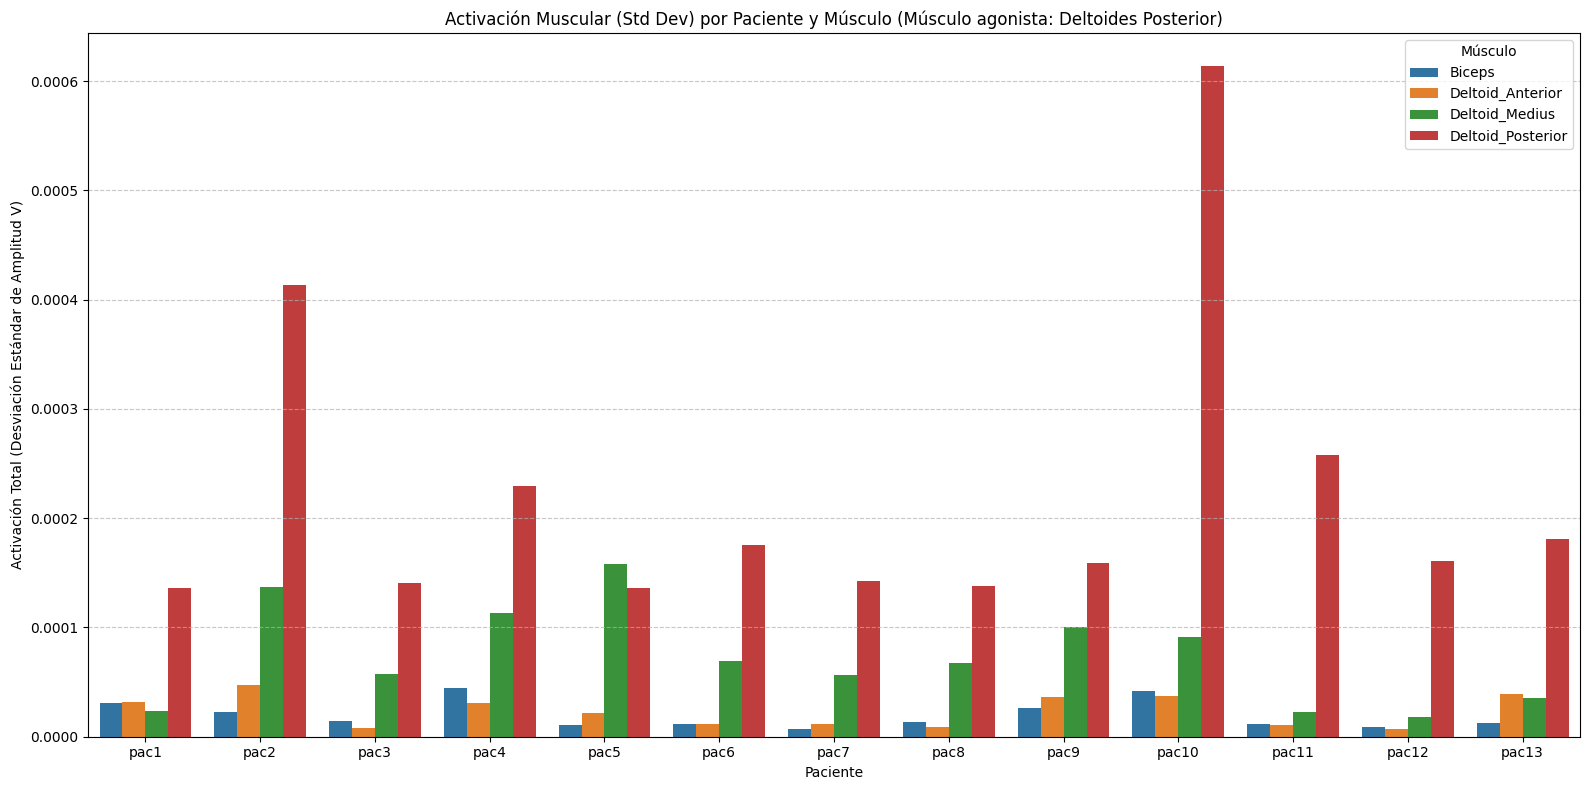

In [3]:

file_list = [
    'trial_3_pac1.csv', 'trial_3_pac2.csv', 'trial_3_pac3.csv', 'trial_3_pac4.csv',
    'trial_3_pac5.csv', 'trial_3_pac6.csv', 'trial_3_pac7.csv', 'trial_3_pac8.csv',
    'trial_3_pac9.csv', 'trial_3_pac10.csv', 'trial_3_pac11.csv', 'trial_3_pac12.csv',
    'trial_3_pac13.csv'
]

# Columnas que queremos conservar y sus nuevos nombres más simples
columns_to_use = {
    'X [s]': 'Time_s',
    'R BICEPS BRACHII: EMG 1 [V]': 'Biceps',
    'R DELTOID ANTERIOR: EMG 2 [V]': 'Deltoid_Anterior',
    'R DELTOID MEDIUS: EMG 6 [V]': 'Deltoid_Medius',
    'R DELTOID POSTERIOR: EMG 7 [V]': 'Deltoid_Posterior'
}

# --- PASO 1: Carga y Consolidación ---

all_dfs_list = []
# Expresión regular para encontrar 'pac' seguido de uno o más números
patient_pattern = re.compile(r'pac(\d+)') 

print("--- Iniciando Carga y Consolidación ---")
for file_path in file_list:
    try:
        # Extraer el número de paciente del nombre del archivo
        match = patient_pattern.search(file_path)
        if match:
            # ej: "pac1", "pac10"
            patient_id = f"pac{match.group(1)}" 
        else:
            patient_id = "unknown"

        # Cargar el CSV
        df = pd.read_csv(file_path)
        
        # Seleccionar y renombrar las columnas que definimos arriba
        clean_df = df[list(columns_to_use.keys())].rename(columns=columns_to_use)
        
        # Añadir la nueva columna 'Patient' para saber de quién son los datos
        clean_df['Patient'] = patient_id
        
        # Añadir este DataFrame limpio a nuestra lista
        all_dfs_list.append(clean_df)
        print(f"Cargado exitosamente: {file_path} (como {patient_id})")

    except Exception as e:
        print(f"Error cargando {file_path}: {e}")

# Concatenar (unir) todos los DataFrames de la lista en uno solo
try:
    all_data_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n--- Consolidación Completa ---")
    # .info() nos da un resumen de la tabla final (cuántas filas, columnas, etc.)
    all_data_df.info()

    # --- PASO 2: Análisis de Duración ---
    print("\n--- Duración de la Prueba por Paciente (en segundos) ---")
    # Agrupamos por paciente y encontramos el valor máximo de tiempo
    durations = all_data_df.groupby('Patient')['Time_s'].max()
    print(durations)

    # --- PASO 3: Análisis Agregado (Todos los pacientes juntos) ---
    
    # Convertir la tabla de formato "ancho" a "largo".
    # Esto es necesario para que Seaborn pueda graficar por 'Muscle'
    long_df = all_data_df.melt(id_vars=['Patient', 'Time_s'],
                               var_name='Muscle',
                               value_name='Amplitude_V')

    print("\n--- Estadísticas Descriptivas Agregadas (Todos los Pacientes) ---")
    # Agrupar por músculo y calcular estadísticas (media, std, min, max)
    aggregated_stats = long_df.groupby('Muscle')['Amplitude_V'].describe()
    print(aggregated_stats)

    # Graficar el Box Plot Agregado
    plt.figure(figsize=(12, 7))
    # showfliers=False oculta los valores atípicos para ver mejor las "cajas"
    sns.boxplot(x='Muscle', y='Amplitude_V', data=long_df, showfliers=False) 
    plt.title('Distribución de Amplitud Agregada (Músculo agonista: Deltoides Posterior)')
    plt.ylabel('Amplitud (V)')
    plt.xlabel('Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('group_muscle_boxplot.png')
    print("\nGráfico de Box Plot Agregado guardado como 'group_muscle_boxplot.png'")

    # --- PASO 4: Análisis de Variabilidad (Inter-Paciente) ---
    
    # Calculamos la Desviación Estándar (std) como un indicador de "activación total"
    # para cada músculo y cada paciente.
    std_df = long_df.groupby(['Patient', 'Muscle'])['Amplitude_V'].std().reset_index()

    # Obtener una lista ordenada de pacientes (pac1, pac2, ... pac10)
    # para que el gráfico se muestre en orden.
    patient_order = sorted(std_df['Patient'].unique(), key=lambda x: int(re.search(r'(\d+)', x).group(1)))

    # Gráfico de Barras Agrupado
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Patient', y='Amplitude_V', hue='Muscle', data=std_df, order=patient_order)
    plt.title('Activación Muscular (Std Dev) por Paciente y Músculo (Músculo agonista: Deltoides Posterior)')
    plt.ylabel('Activación Total (Desviación Estándar de Amplitud V)')
    plt.xlabel('Paciente')
    plt.legend(title='Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta el gráfico para que todo quepa
    plt.savefig('patient_variability_barchart.png')
    print("Gráfico de Variabilidad por Paciente guardado como 'patient_variability_barchart.png'")

except Exception as e:
    print(f"Error durante el análisis o graficación: {e}")

### Código para evaluacion de Trial 5

--- Iniciando Carga y Consolidación ---
Cargado exitosamente: trial_5_pac1.csv (como pac1)
Cargado exitosamente: trial_5_pac2.csv (como pac2)
Cargado exitosamente: trial_5_pac3.csv (como pac3)
Cargado exitosamente: trial_5_pac4.csv (como pac4)
Cargado exitosamente: trial_5_pac5.csv (como pac5)
Cargado exitosamente: trial_5_pac6.csv (como pac6)
Cargado exitosamente: trial_5_pac7.csv (como pac7)
Cargado exitosamente: trial_5_pac8.csv (como pac8)
Cargado exitosamente: trial_5_pac9.csv (como pac9)
Cargado exitosamente: trial_5_pac10.csv (como pac10)
Cargado exitosamente: trial_5_pac11.csv (como pac11)
Cargado exitosamente: trial_5_pac12.csv (como pac12)
Cargado exitosamente: trial_5_pac13.csv (como pac13)

--- Consolidación Completa ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224400 entries, 0 to 4224399
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Time_s             float64
 1   Biceps             float64
 2   Deltoid_Ante

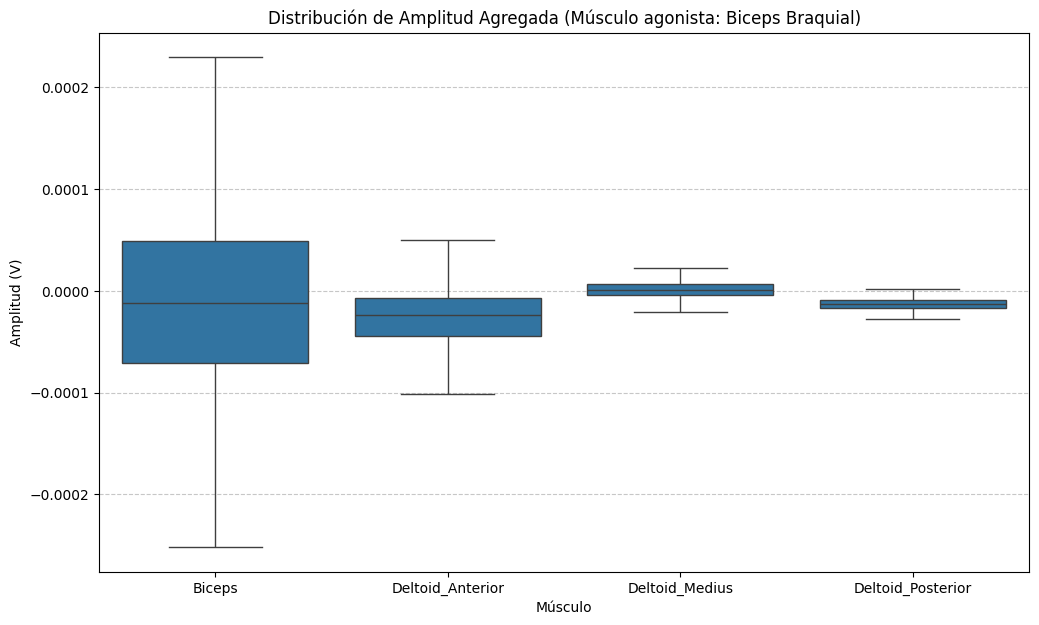

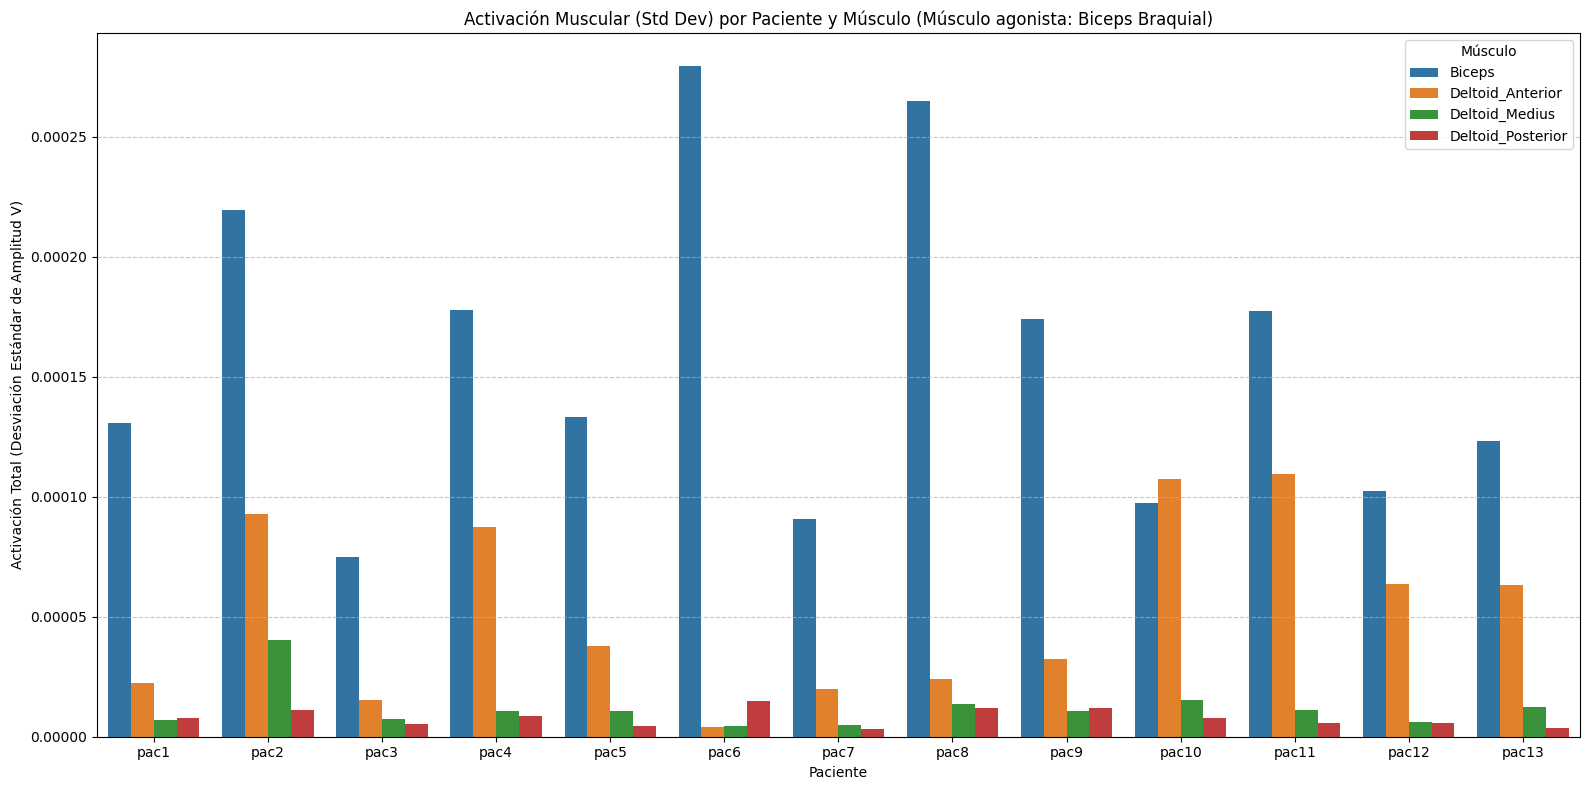

In [4]:

file_list = [
    'trial_5_pac1.csv', 'trial_5_pac2.csv', 'trial_5_pac3.csv', 'trial_5_pac4.csv',
    'trial_5_pac5.csv', 'trial_5_pac6.csv', 'trial_5_pac7.csv', 'trial_5_pac8.csv',
    'trial_5_pac9.csv', 'trial_5_pac10.csv', 'trial_5_pac11.csv', 'trial_5_pac12.csv',
    'trial_5_pac13.csv'
]

# Columnas que queremos conservar y sus nuevos nombres más simples
columns_to_use = {
    'X [s]': 'Time_s',
    'R BICEPS BRACHII: EMG 1 [V]': 'Biceps',
    'R DELTOID ANTERIOR: EMG 2 [V]': 'Deltoid_Anterior',
    'R DELTOID MEDIUS: EMG 6 [V]': 'Deltoid_Medius',
    'R DELTOID POSTERIOR: EMG 7 [V]': 'Deltoid_Posterior'
}

# --- PASO 1: Carga y Consolidación ---

all_dfs_list = []
# Expresión regular para encontrar 'pac' seguido de uno o más números
patient_pattern = re.compile(r'pac(\d+)') 

print("--- Iniciando Carga y Consolidación ---")
for file_path in file_list:
    try:
        # Extraer el número de paciente del nombre del archivo
        match = patient_pattern.search(file_path)
        if match:
            # ej: "pac1", "pac10"
            patient_id = f"pac{match.group(1)}" 
        else:
            patient_id = "unknown"

        # Cargar el CSV
        df = pd.read_csv(file_path)
        
        # Seleccionar y renombrar las columnas que definimos arriba
        clean_df = df[list(columns_to_use.keys())].rename(columns=columns_to_use)
        
        # Añadir la nueva columna 'Patient' para saber de quién son los datos
        clean_df['Patient'] = patient_id
        
        # Añadir este DataFrame limpio a nuestra lista
        all_dfs_list.append(clean_df)
        print(f"Cargado exitosamente: {file_path} (como {patient_id})")

    except Exception as e:
        print(f"Error cargando {file_path}: {e}")

# Concatenar (unir) todos los DataFrames de la lista en uno solo
try:
    all_data_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n--- Consolidación Completa ---")
    # .info() nos da un resumen de la tabla final (cuántas filas, columnas, etc.)
    all_data_df.info()

    # --- PASO 2: Análisis de Duración ---
    print("\n--- Duración de la Prueba por Paciente (en segundos) ---")
    # Agrupamos por paciente y encontramos el valor máximo de tiempo
    durations = all_data_df.groupby('Patient')['Time_s'].max()
    print(durations)

    # --- PASO 3: Análisis Agregado (Todos los pacientes juntos) ---
    
    # Convertir la tabla de formato "ancho" a "largo".
    # Esto es necesario para que Seaborn pueda graficar por 'Muscle'
    long_df = all_data_df.melt(id_vars=['Patient', 'Time_s'],
                               var_name='Muscle',
                               value_name='Amplitude_V')

    print("\n--- Estadísticas Descriptivas Agregadas (Todos los Pacientes) ---")
    # Agrupar por músculo y calcular estadísticas (media, std, min, max)
    aggregated_stats = long_df.groupby('Muscle')['Amplitude_V'].describe()
    print(aggregated_stats)

    # Graficar el Box Plot Agregado
    plt.figure(figsize=(12, 7))
    # showfliers=False oculta los valores atípicos para ver mejor las "cajas"
    sns.boxplot(x='Muscle', y='Amplitude_V', data=long_df, showfliers=False) 
    plt.title('Distribución de Amplitud Agregada (Músculo agonista: Biceps Braquial)')
    plt.ylabel('Amplitud (V)')
    plt.xlabel('Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('group_muscle_boxplot.png')
    print("\nGráfico de Box Plot Agregado guardado como 'group_muscle_boxplot.png'")

    # --- PASO 4: Análisis de Variabilidad (Inter-Paciente) ---
    
    # Calculamos la Desviación Estándar (std) como un indicador de "activación total"
    # para cada músculo y cada paciente.
    std_df = long_df.groupby(['Patient', 'Muscle'])['Amplitude_V'].std().reset_index()

    # Obtener una lista ordenada de pacientes (pac1, pac2, ... pac10)
    # para que el gráfico se muestre en orden.
    patient_order = sorted(std_df['Patient'].unique(), key=lambda x: int(re.search(r'(\d+)', x).group(1)))

    # Gráfico de Barras Agrupado
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Patient', y='Amplitude_V', hue='Muscle', data=std_df, order=patient_order)
    plt.title('Activación Muscular (Std Dev) por Paciente y Músculo (Músculo agonista: Biceps Braquial)')
    plt.ylabel('Activación Total (Desviación Estándar de Amplitud V)')
    plt.xlabel('Paciente')
    plt.legend(title='Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta el gráfico para que todo quepa
    plt.savefig('patient_variability_barchart.png')
    print("Gráfico de Variabilidad por Paciente guardado como 'patient_variability_barchart.png'")

except Exception as e:
    print(f"Error durante el análisis o graficación: {e}")

### Código para evaluacion de Trial 7


--- Iniciando Carga y Consolidación ---
Cargado exitosamente: trial_7_pac1.csv (como pac1)
Cargado exitosamente: trial_7_pac2.csv (como pac2)
Cargado exitosamente: trial_7_pac3.csv (como pac3)
Cargado exitosamente: trial_7_pac4.csv (como pac4)
Cargado exitosamente: trial_7_pac5.csv (como pac5)
Cargado exitosamente: trial_7_pac6.csv (como pac6)
Cargado exitosamente: trial_7_pac7.csv (como pac7)
Cargado exitosamente: trial_7_pac8.csv (como pac8)
Cargado exitosamente: trial_7_pac9.csv (como pac9)
Cargado exitosamente: trial_7_pac10.csv (como pac10)
Cargado exitosamente: trial_7_pac11.csv (como pac11)
Cargado exitosamente: trial_7_pac12.csv (como pac12)
Cargado exitosamente: trial_7_pac13.csv (como pac13)

--- Consolidación Completa ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957496 entries, 0 to 1957495
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Time_s             float64
 1   Biceps             float64
 2   Deltoid_Ante

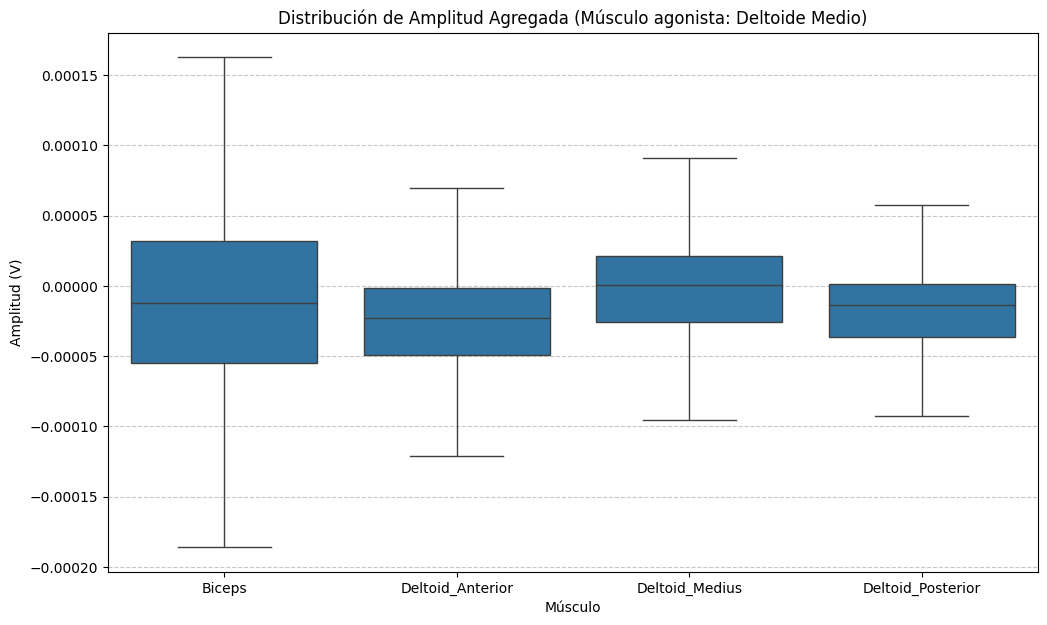

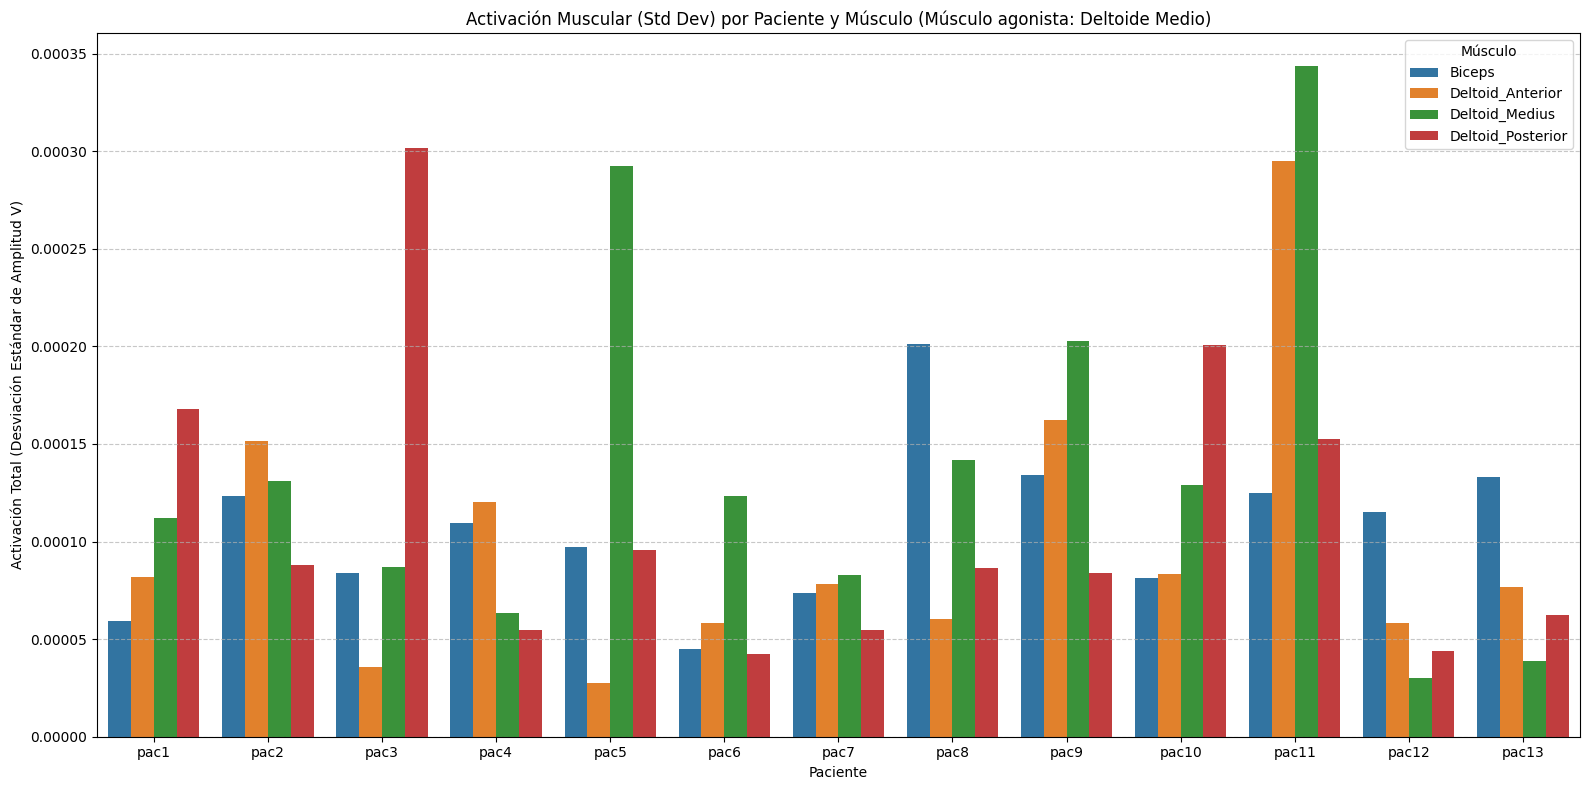

In [5]:
file_list = [
    'trial_7_pac1.csv', 'trial_7_pac2.csv', 'trial_7_pac3.csv', 'trial_7_pac4.csv',
    'trial_7_pac5.csv', 'trial_7_pac6.csv', 'trial_7_pac7.csv', 'trial_7_pac8.csv',
    'trial_7_pac9.csv', 'trial_7_pac10.csv', 'trial_7_pac11.csv', 'trial_7_pac12.csv',
    'trial_7_pac13.csv'
]

# Columnas que queremos conservar y sus nuevos nombres más simples
columns_to_use = {
    'X [s]': 'Time_s',
    'R BICEPS BRACHII: EMG 1 [V]': 'Biceps',
    'R DELTOID ANTERIOR: EMG 2 [V]': 'Deltoid_Anterior',
    'R DELTOID MEDIUS: EMG 6 [V]': 'Deltoid_Medius',
    'R DELTOID POSTERIOR: EMG 7 [V]': 'Deltoid_Posterior'
}

# --- PASO 1: Carga y Consolidación ---

all_dfs_list = []
# Expresión regular para encontrar 'pac' seguido de uno o más números
patient_pattern = re.compile(r'pac(\d+)') 

print("--- Iniciando Carga y Consolidación ---")
for file_path in file_list:
    try:
        # Extraer el número de paciente del nombre del archivo
        match = patient_pattern.search(file_path)
        if match:
            # ej: "pac1", "pac10"
            patient_id = f"pac{match.group(1)}" 
        else:
            patient_id = "unknown"

        # Cargar el CSV
        df = pd.read_csv(file_path)
        
        # Seleccionar y renombrar las columnas que definimos arriba
        clean_df = df[list(columns_to_use.keys())].rename(columns=columns_to_use)
        
        # Añadir la nueva columna 'Patient' para saber de quién son los datos
        clean_df['Patient'] = patient_id
        
        # Añadir este DataFrame limpio a nuestra lista
        all_dfs_list.append(clean_df)
        print(f"Cargado exitosamente: {file_path} (como {patient_id})")

    except Exception as e:
        print(f"Error cargando {file_path}: {e}")

# Concatenar (unir) todos los DataFrames de la lista en uno solo
try:
    all_data_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n--- Consolidación Completa ---")
    # .info() nos da un resumen de la tabla final (cuántas filas, columnas, etc.)
    all_data_df.info()

    # --- PASO 2: Análisis de Duración ---
    print("\n--- Duración de la Prueba por Paciente (en segundos) ---")
    # Agrupamos por paciente y encontramos el valor máximo de tiempo
    durations = all_data_df.groupby('Patient')['Time_s'].max()
    print(durations)

    # --- PASO 3: Análisis Agregado (Todos los pacientes juntos) ---
    
    # Convertir la tabla de formato "ancho" a "largo".
    # Esto es necesario para que Seaborn pueda graficar por 'Muscle'
    long_df = all_data_df.melt(id_vars=['Patient', 'Time_s'],
                               var_name='Muscle',
                               value_name='Amplitude_V')

    print("\n--- Estadísticas Descriptivas Agregadas (Todos los Pacientes) ---")
    # Agrupar por músculo y calcular estadísticas (media, std, min, max)
    aggregated_stats = long_df.groupby('Muscle')['Amplitude_V'].describe()
    print(aggregated_stats)

    # Graficar el Box Plot Agregado
    plt.figure(figsize=(12, 7))
    # showfliers=False oculta los valores atípicos para ver mejor las "cajas"
    sns.boxplot(x='Muscle', y='Amplitude_V', data=long_df, showfliers=False) 
    plt.title('Distribución de Amplitud Agregada (Músculo agonista: Deltoide Medio)')
    plt.ylabel('Amplitud (V)')
    plt.xlabel('Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('group_muscle_boxplot.png')
    print("\nGráfico de Box Plot Agregado guardado como 'group_muscle_boxplot.png'")

    # --- PASO 4: Análisis de Variabilidad (Inter-Paciente) ---
    
    # Calculamos la Desviación Estándar (std) como un indicador de "activación total"
    # para cada músculo y cada paciente.
    std_df = long_df.groupby(['Patient', 'Muscle'])['Amplitude_V'].std().reset_index()

    # Obtener una lista ordenada de pacientes (pac1, pac2, ... pac10)
    # para que el gráfico se muestre en orden.
    patient_order = sorted(std_df['Patient'].unique(), key=lambda x: int(re.search(r'(\d+)', x).group(1)))

    # Gráfico de Barras Agrupado
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Patient', y='Amplitude_V', hue='Muscle', data=std_df, order=patient_order)
    plt.title('Activación Muscular (Std Dev) por Paciente y Músculo (Músculo agonista: Deltoide Medio)')
    plt.ylabel('Activación Total (Desviación Estándar de Amplitud V)')
    plt.xlabel('Paciente')
    plt.legend(title='Músculo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta el gráfico para que todo quepa
    plt.savefig('patient_variability_barchart.png')
    print("Gráfico de Variabilidad por Paciente guardado como 'patient_variability_barchart.png'")

except Exception as e:
    print(f"Error durante el análisis o graficación: {e}")